#### Business Problem:

#### Project Objective:

#### Tools and Technologies Used:

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore,shapiro,normaltest

from sklearn.model_selection import train_test_split,RandomizedSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,multilabel_confusion_matrix,classification_report

import pickle

import warnings as w
w.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\Akash\Desktop\P315_AkashNikam\ML\train.csv")
df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1           28                   0   
1   2    Male   76                1            3                   0   
2   3    Male   47                1           28                   0   
3   4    Male   21                1           11                   1   
4   5  Female   29                1           41                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes           40454                    26      217   
1    1-2 Year             No           33536                    26      183   
2   > 2 Years            Yes           38294                    26       27   
3    < 1 Year             No           28619                   152      203   
4    < 1 Year             No           27496                   152       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [4]:
df.size

359988

In [5]:
df.shape

(29999, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    29999 non-null  int64 
 1   Gender                29999 non-null  object
 2   Age                   29999 non-null  int64 
 3   Driving_License       29999 non-null  int64 
 4   Region_Code           29999 non-null  int64 
 5   Previously_Insured    29999 non-null  int64 
 6   Vehicle_Age           29999 non-null  object
 7   Vehicle_Damage        29999 non-null  object
 8   Annual_Premium        29999 non-null  int64 
 9   Policy_Sales_Channel  29999 non-null  int64 
 10  Vintage               29999 non-null  int64 
 11  Response              29999 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 2.7+ MB


In [7]:
df.describe()

id           Age  Driving_License   Region_Code  \
count  29999.000000  29999.000000     29999.000000  29999.000000   
mean   15000.000000     38.800493         0.997800     26.444881   
std     8660.109699     15.567037         0.046854     13.141380   
min        1.000000     20.000000         0.000000      0.000000   
25%     7500.500000     25.000000         1.000000     15.000000   
50%    15000.000000     36.000000         1.000000     28.000000   
75%    22499.500000     49.000000         1.000000     35.000000   
max    29999.000000     84.000000         1.000000     52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel       Vintage  \
count        29999.000000    29999.000000          29999.000000  29999.000000   
mean             0.452415    30628.777359            112.546518    154.313544   
std              0.497739    17008.535788             53.911986     83.531808   
min              0.000000     2630.000000              1.000000     10.000000   
25%              0.000000    24473.500000             30.000000     82.000000   
50%              0.000000    31786.000000            150.000000    154.000000   
75%              1.000000    39533.000000            152.000000    227.000000   
max              1.000000   508073.000000            163.000000    299.000000   

           Response  
count  29999.000000  
mean       0.123837  
std        0.329402  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [8]:
df.isna()

id  Gender    Age  Driving_License  Region_Code  Previously_Insured  \
0      False   False  False            False        False               False   
1      False   False  False            False        False               False   
2      False   False  False            False        False               False   
3      False   False  False            False        False               False   
4      False   False  False            False        False               False   
...      ...     ...    ...              ...          ...                 ...   
29994  False   False  False            False        False               False   
29995  False   False  False            False        False               False   
29996  False   False  False            False        False               False   
29997  False   False  False            False        False               False   
29998  False   False  False            False        False               False   

       Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0            False           False           False                 False   
1            False           False           False                 False   
2            False           False           False                 False   
3            False           False           False                 False   
4            False           False           False                 False   
...            ...             ...             ...                   ...   
29994        False           False           False                 False   
29995        False           False           False                 False   
29996        False           False           False                 False   
29997        False           False           False                 False   
29998        False           False           False                 False   

       Vintage  Response  
0        False     False  
1        False     False  
2        False     False  
3        False     False  
4        False     False  
...        ...       ...  
29994    False     False  
29995    False     False  
29996    False     False  
29997    False     False  
29998    False     False  

[29999 rows x 12 columns]

In [9]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [10]:
df.drop(["id"],axis=1,inplace=True)
df

Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0        Male   44                1           28                   0   
1        Male   76                1            3                   0   
2        Male   47                1           28                   0   
3        Male   21                1           11                   1   
4      Female   29                1           41                   1   
...       ...  ...              ...          ...                 ...   
29994    Male   23                1           21                   1   
29995    Male   23                1           30                   1   
29996    Male   23                1           36                   0   
29997  Female   32                1           26                   1   
29998    Male   22                1            8                   1   

      Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0       > 2 Years            Yes           40454                    26   
1        1-2 Year             No           33536                    26   
2       > 2 Years            Yes           38294                    26   
3        < 1 Year             No           28619                   152   
4        < 1 Year             No           27496                   152   
...           ...            ...             ...                   ...   
29994    < 1 Year             No            2630                   152   
29995    < 1 Year             No           39592                   152   
29996    < 1 Year            Yes           27370                   152   
29997    < 1 Year             No            2630                   152   
29998    < 1 Year             No            2630                    26   

       Vintage  Response  
0          217         1  
1          183         0  
2           27         1  
3          203         0  
4           39         0  
...        ...       ...  
29994      272         0  
29995      231         0  
29996      210         1  
29997       71         0  
29998      187         0  

[29999 rows x 11 columns]

In [11]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [12]:
num_col=['Age','Region_Code','Annual_Premium','Policy_Sales_Channel', 'Vintage']
stat={}
for col in num_col:
    stat[col]={
        "Mean":df[col].mean(),
        "Median":df[col].median(),
        "Mode":df[col].mode()[0],
        "Skewness":df[col].skew(),
        "Variance":df[col].var(),
        "Standard Deviation":df[col].std(),
        "IQR":df[col].quantile(0.75)-df[col].quantile(0.25),
        "Range":df[col].max()-df[col].min()
}
stats=pd.DataFrame(stat)
stats


Age  Region_Code  Annual_Premium  \
Mean                 38.800493    26.444881    3.062878e+04   
Median               36.000000    28.000000    3.178600e+04   
Mode                 24.000000    28.000000    2.630000e+03   
Skewness              0.680966    -0.120780    1.366959e+00   
Variance            242.332654   172.695867    2.892903e+08   
Standard Deviation   15.567037    13.141380    1.700854e+04   
IQR                  24.000000    20.000000    1.505950e+04   
Range                64.000000    52.000000    5.054430e+05   

                    Policy_Sales_Channel      Vintage  
Mean                          112.546518   154.313544  
Median                        150.000000   154.000000  
Mode                          152.000000    73.000000  
Skewness                       -0.919233     0.004502  
Variance                     2906.502195  6977.562931  
Standard Deviation             53.911986    83.531808  
IQR                           122.000000   145.000000  
Range                         162.000000   289.000000

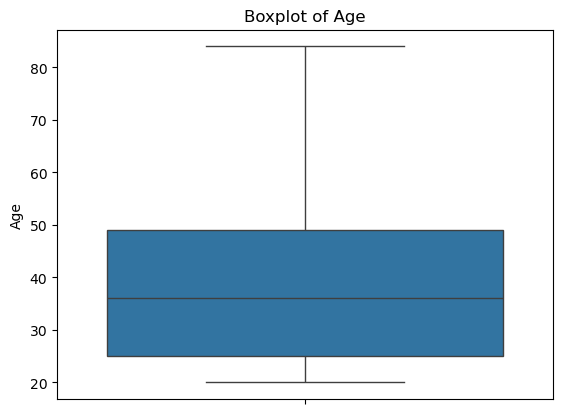

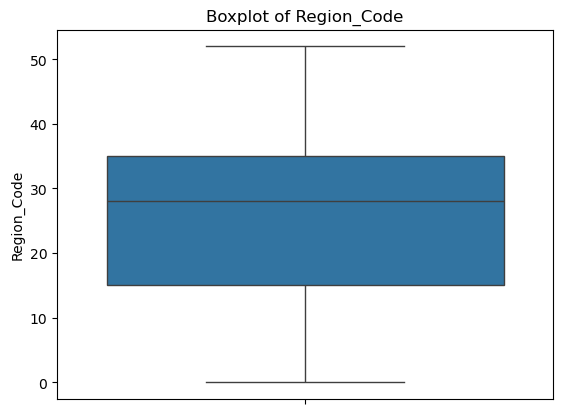

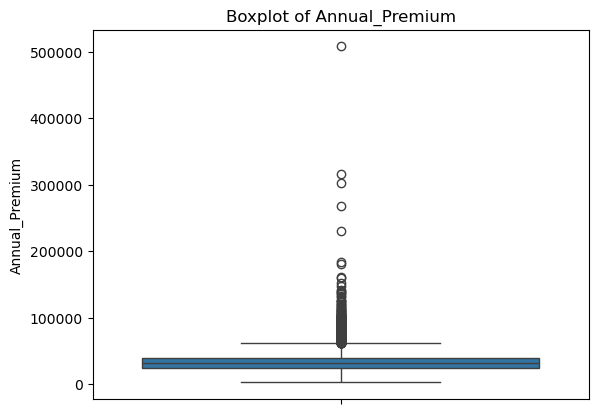

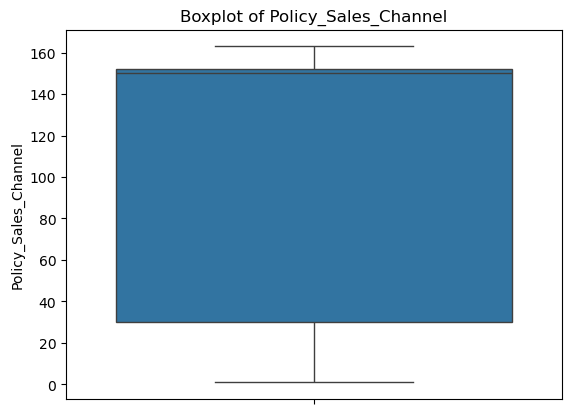

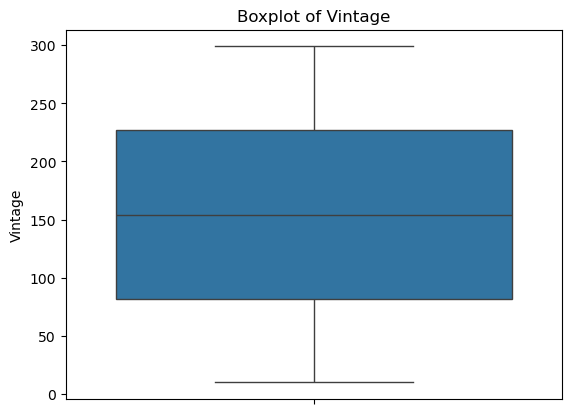

In [13]:
for col in num_col:
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [14]:
#### Handling outliers

IQR : 24.0
LowerTail : -11.0
UpperTail : 85.0

Boxplot after handling outliers :


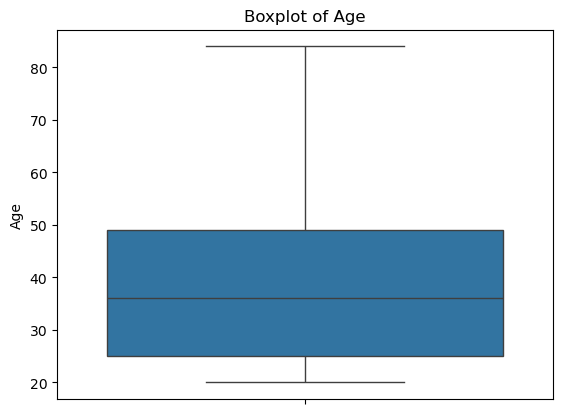

****************************************************************************************************
IQR : 20.0
LowerTail : -15.0
UpperTail : 65.0

Boxplot after handling outliers :


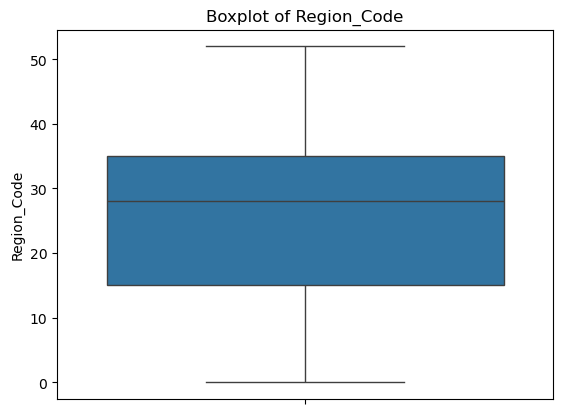

****************************************************************************************************
IQR : 15059.5
LowerTail : 1884.25
UpperTail : 62122.25

Boxplot after handling outliers :


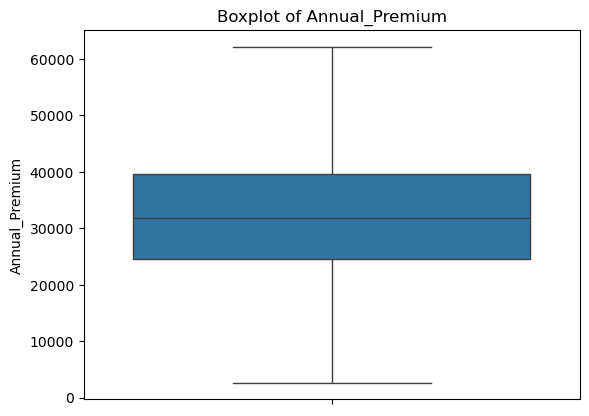

****************************************************************************************************
IQR : 122.0
LowerTail : -153.0
UpperTail : 335.0

Boxplot after handling outliers :


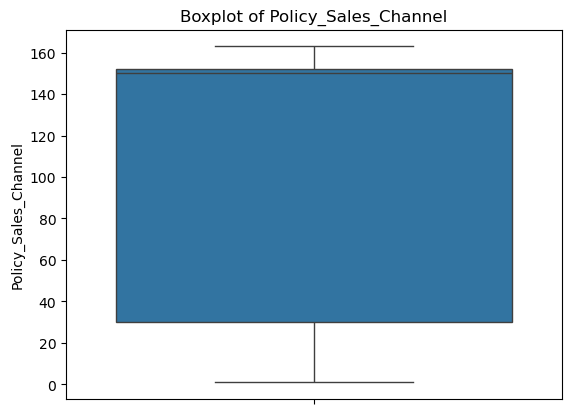

****************************************************************************************************
IQR : 145.0
LowerTail : -135.5
UpperTail : 444.5

Boxplot after handling outliers :


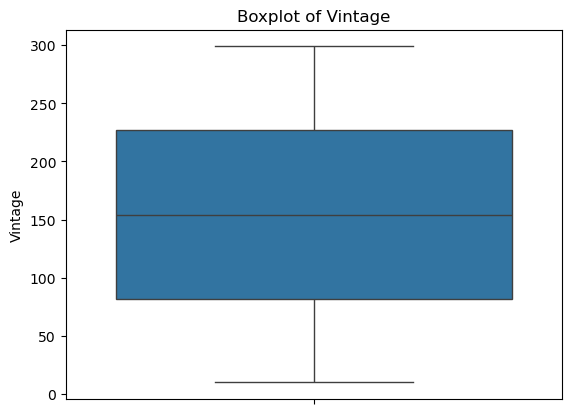

****************************************************************************************************


In [15]:
for col in num_col:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lowertail=q1-1.5*iqr
    uppertail=q3+1.5*iqr
    print(f"IQR : {iqr}")
    print(f"LowerTail : {lowertail}")
    print(f"UpperTail : {uppertail}")

    # check outlier
    outlier=df[(df[col]<lowertail) | (df[col]>uppertail)]
    outlier

    # handling outlier
    df.loc[(df[col]<lowertail),col]=lowertail
    df.loc[(df[col]>uppertail),col]=uppertail
    print("\nBoxplot after handling outliers :")
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()
    print("*"*100)

In [16]:
### Zscore of numerical columns

In [17]:
for col in num_col:
    print(f"Zscore of {col} : ")
    Zscore=zscore(df[col])
    print(Zscore)
    print("*"*100)

Zscore of Age : 
0        0.334013
1        2.389673
2        0.526731
3       -1.143492
4       -0.629578
           ...   
29994   -1.015014
29995   -1.015014
29996   -1.015014
29997   -0.436859
29998   -1.079253
Name: Age, Length: 29999, dtype: float64
****************************************************************************************************
Zscore of Region_Code : 
0        0.118340
1       -1.784080
2        0.118340
3       -1.175306
4        1.107598
           ...   
29994   -0.414338
29995    0.270533
29996    0.727114
29997   -0.033854
29998   -1.403596
Name: Region_Code, Length: 29999, dtype: float64
****************************************************************************************************
Zscore of Annual_Premium : 
0        0.656503
1        0.211489
2        0.517557
3       -0.104806
4       -0.177045
           ...   
29994   -1.776596
29995    0.601053
29996   -0.185150
29997   -1.776596
29998   -1.776596
Name: Annual_Premium, Length: 29999, dtype: 

In [18]:
### Hypotesis Testing

In [19]:
for col in num_col:
    stat,p_val=shapiro(df[col])
    print(f"P_Value : {p_val}")
    if p_val>=0.05:
        print(f"Data normally distributed in column {col}")
    else:
        print(f"Data not nomally distributed in column {col}")
    print("-"*100)

P_Value : 1.6098332051707734e-83
Data not nomally distributed in column Age
----------------------------------------------------------------------------------------------------
P_Value : 1.1902811000934194e-73
Data not nomally distributed in column Region_Code
----------------------------------------------------------------------------------------------------
P_Value : 2.8382966930990554e-78
Data not nomally distributed in column Annual_Premium
----------------------------------------------------------------------------------------------------
P_Value : 1.6202709425539589e-111
Data not nomally distributed in column Policy_Sales_Channel
----------------------------------------------------------------------------------------------------
P_Value : 9.011966689942381e-68
Data not nomally distributed in column Vintage
----------------------------------------------------------------------------------------------------


In [20]:
### Visualization For Numerical Columns

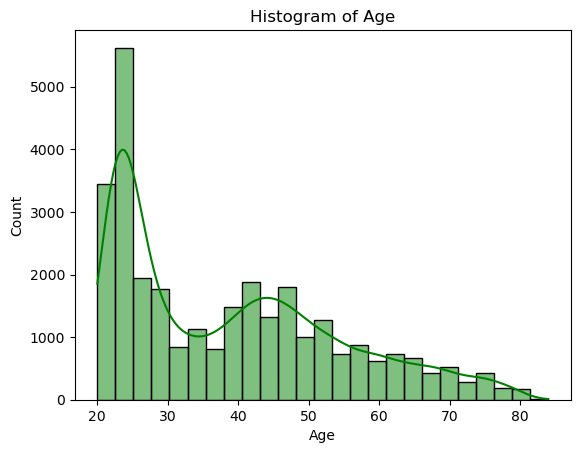

****************************************************************************************************


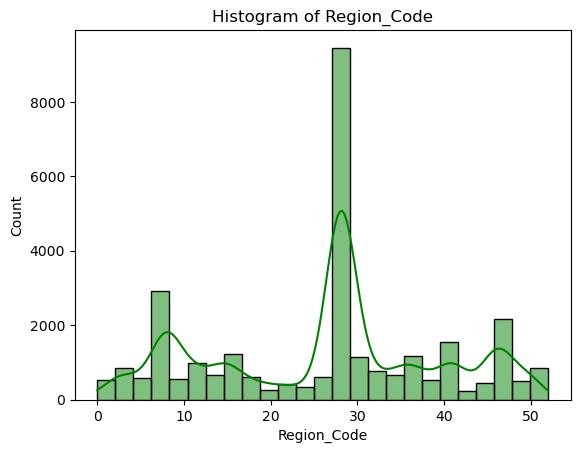

****************************************************************************************************


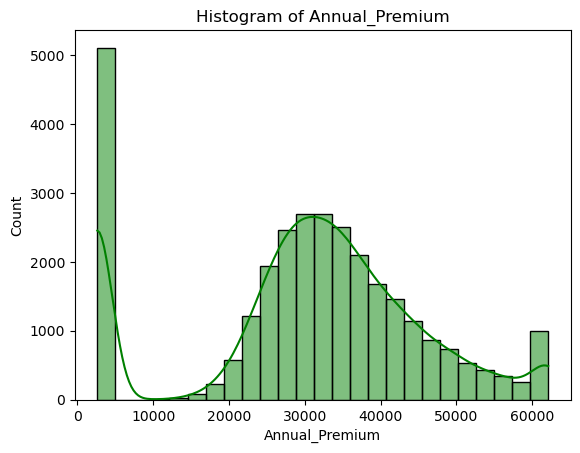

****************************************************************************************************


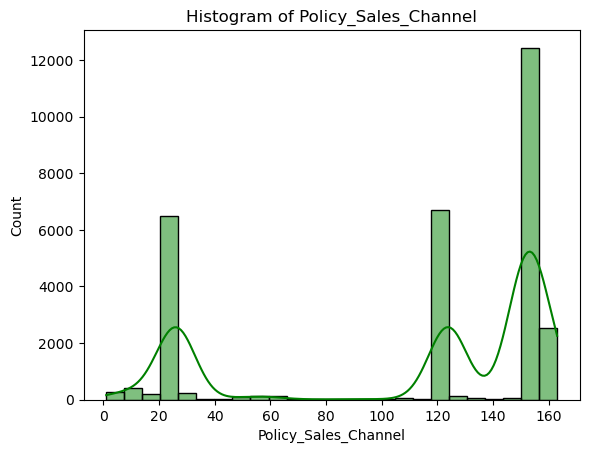

****************************************************************************************************


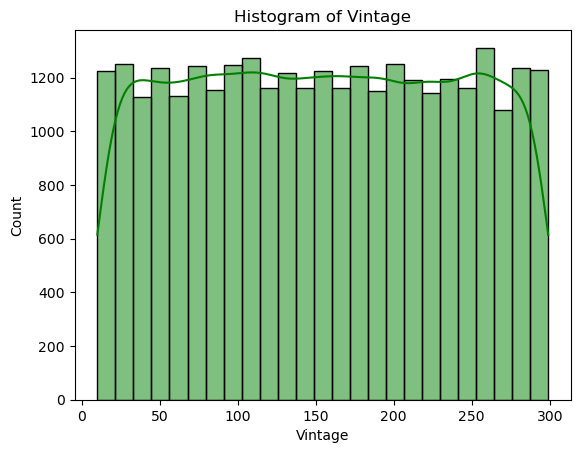

****************************************************************************************************


In [21]:
for col in num_col:
    sns.histplot(df[col],kde=True, bins=25, color="green")
    plt.title(f"Histogram of {col}")
    plt.show()
    print("*"*100)

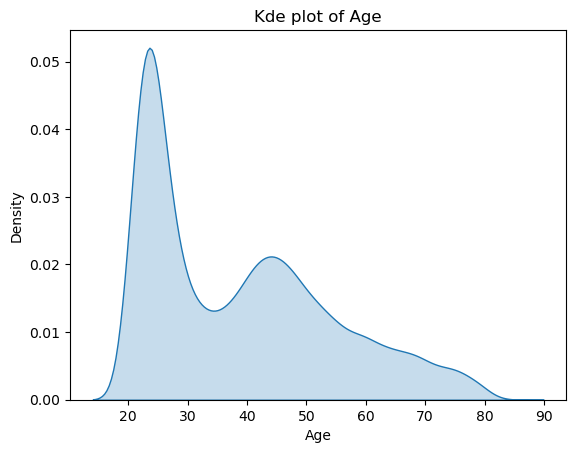

****************************************************************************************************


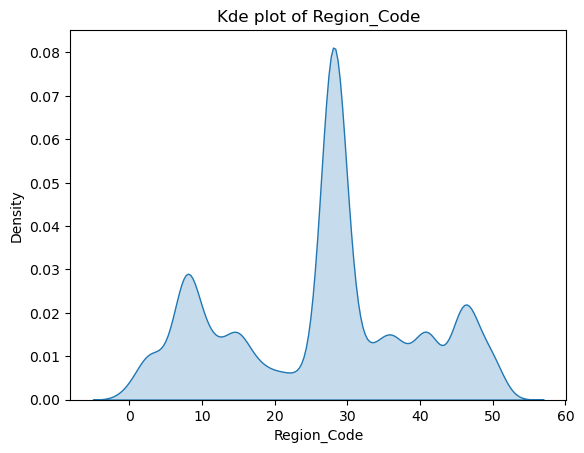

****************************************************************************************************


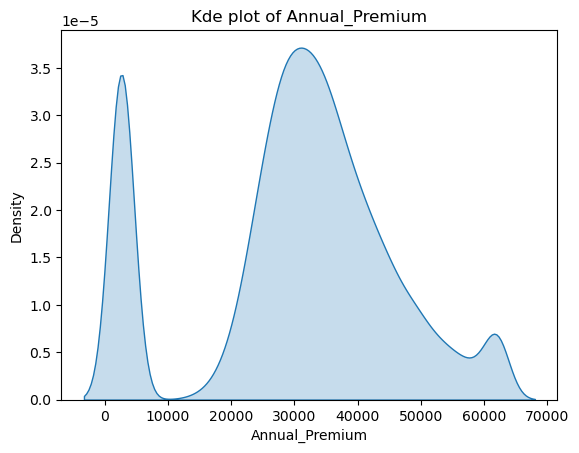

****************************************************************************************************


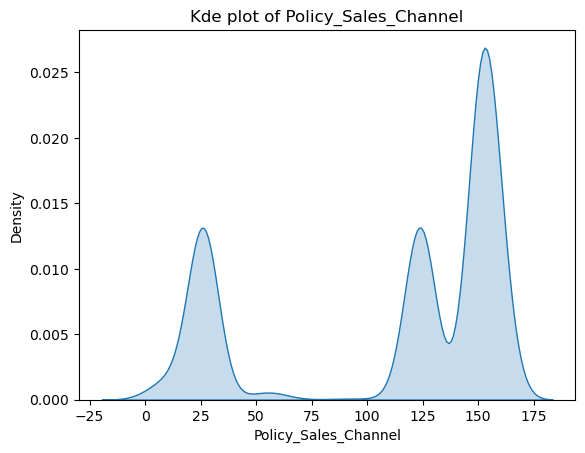

****************************************************************************************************


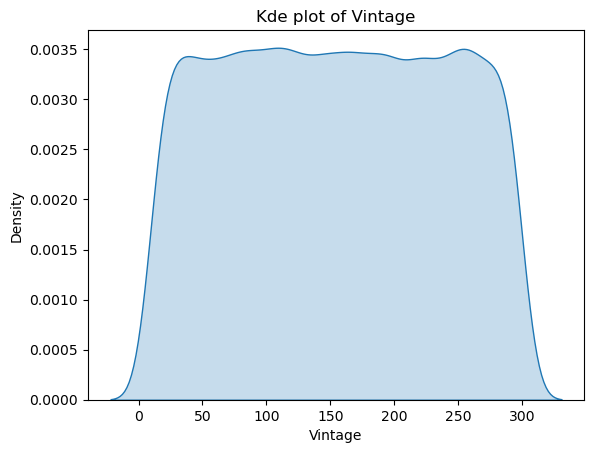

****************************************************************************************************


In [22]:
for col in num_col:
    sns.kdeplot(df[col],fill=True)
    plt.title(f"Kde plot of {col}")
    plt.show()
    print("*"*100)

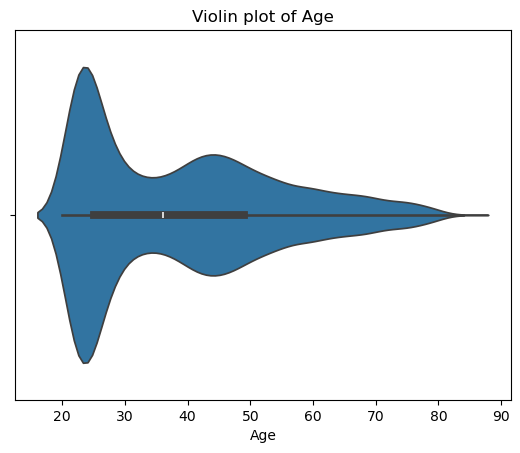

****************************************************************************************************


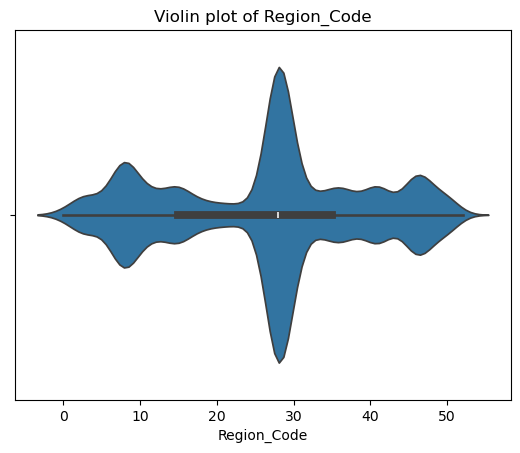

****************************************************************************************************


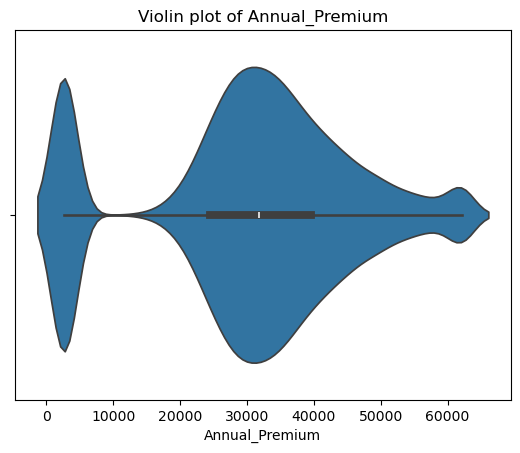

****************************************************************************************************


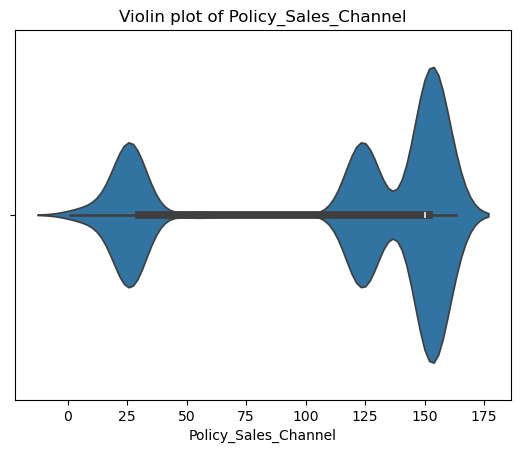

****************************************************************************************************


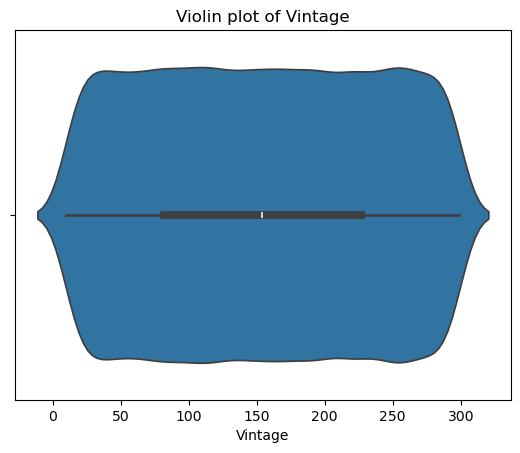

****************************************************************************************************


In [23]:
for col in num_col:
    sns.violinplot(x=df[col],fill=True)
    plt.title(f"Violin plot of {col}")
    plt.show()
    print("*"*100)

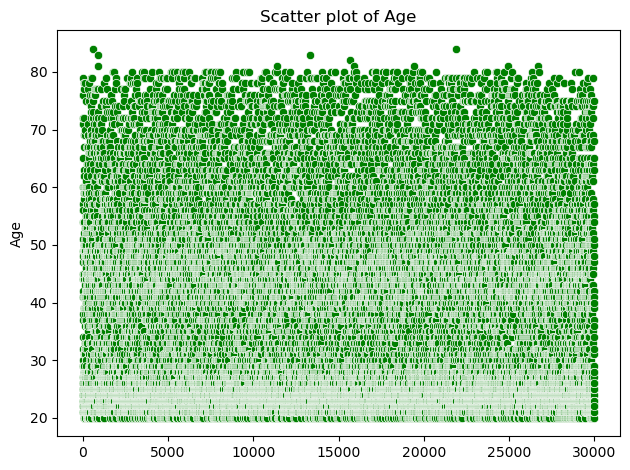

****************************************************************************************************


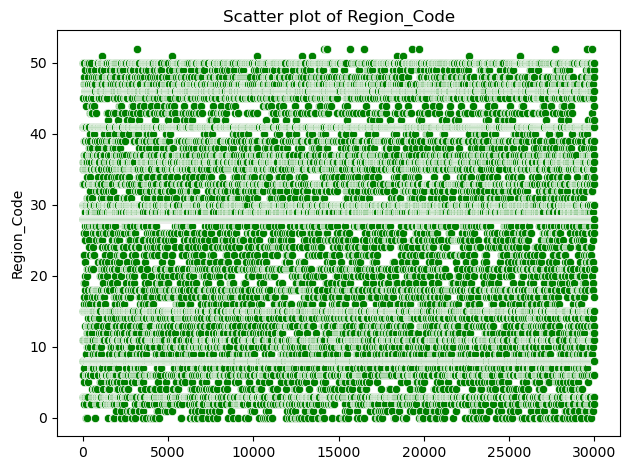

****************************************************************************************************


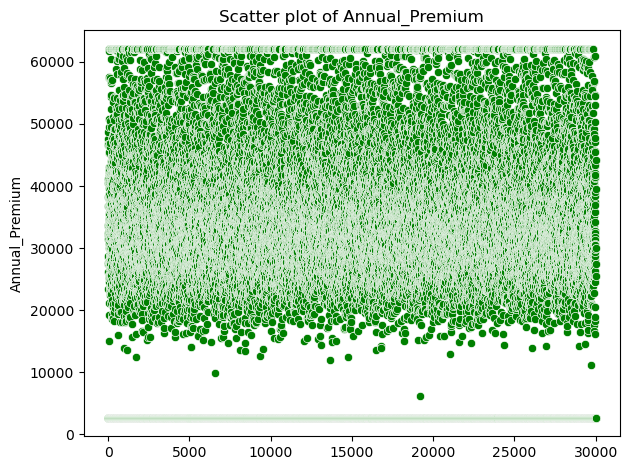

****************************************************************************************************


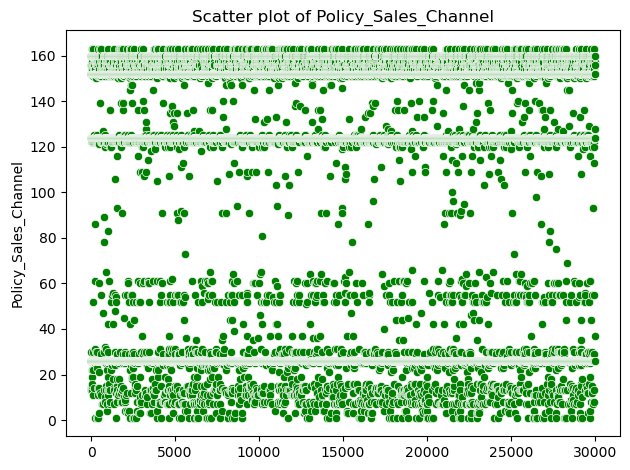

****************************************************************************************************


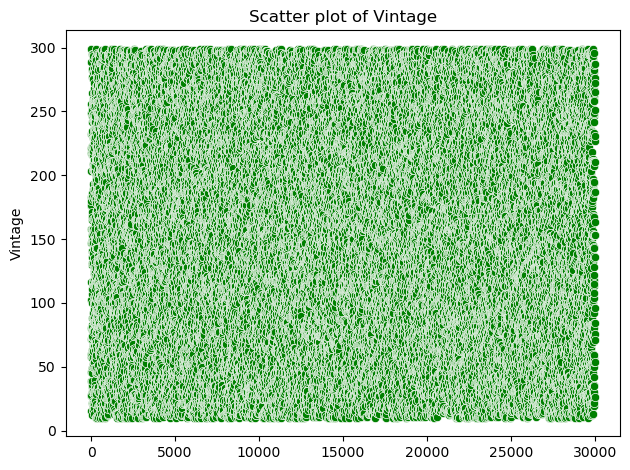

****************************************************************************************************


In [24]:
for col in num_col:
    sns.scatterplot(df[col],color="Green")
    plt.title(f"Scatter plot of {col}")
    plt.tight_layout()
    plt.show()
    print("*"*100)

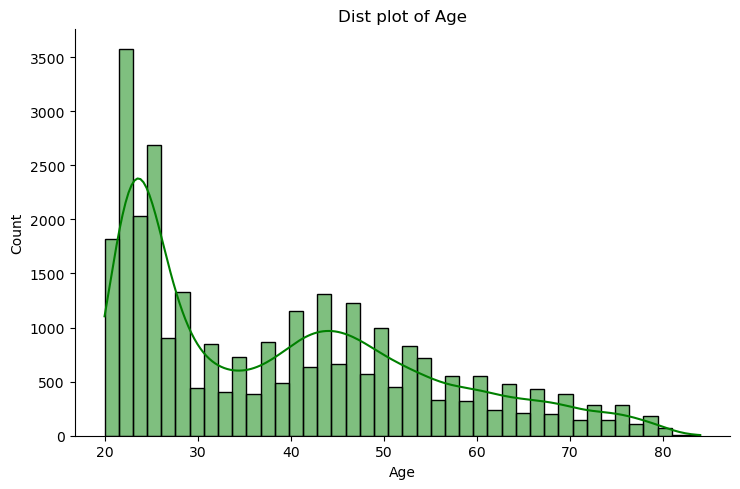

****************************************************************************************************


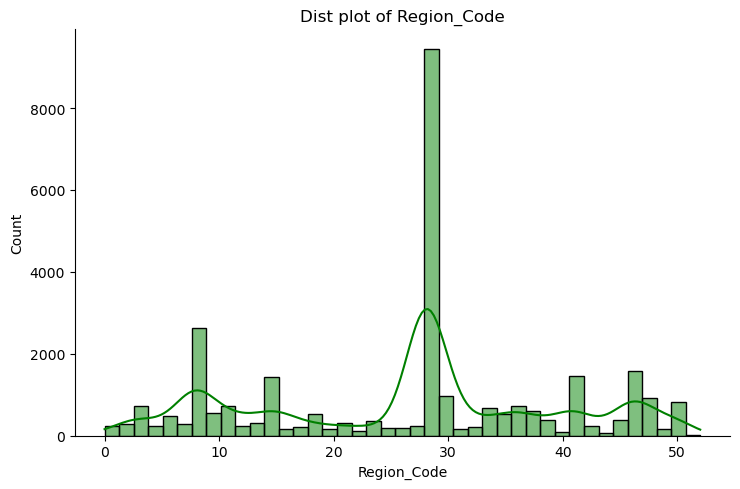

****************************************************************************************************


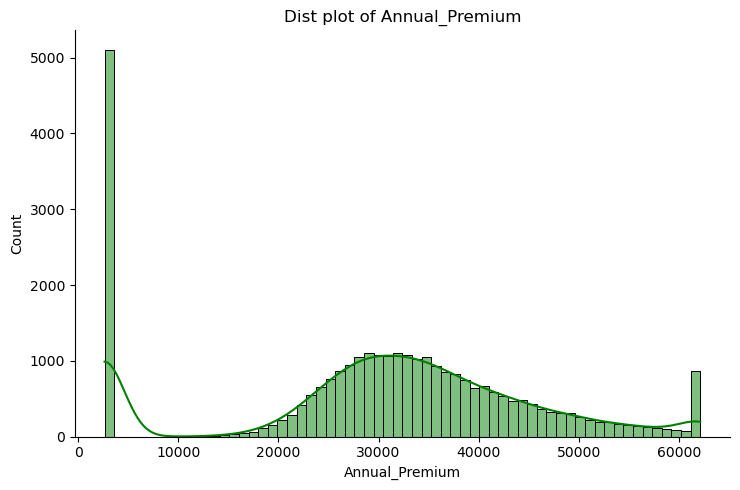

****************************************************************************************************


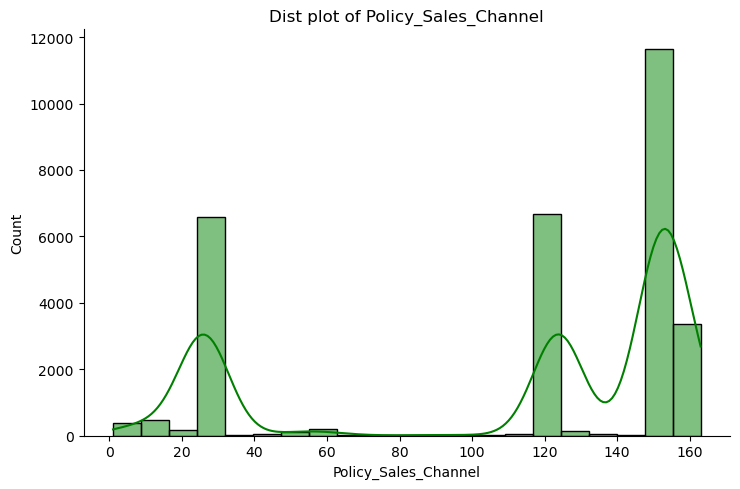

****************************************************************************************************


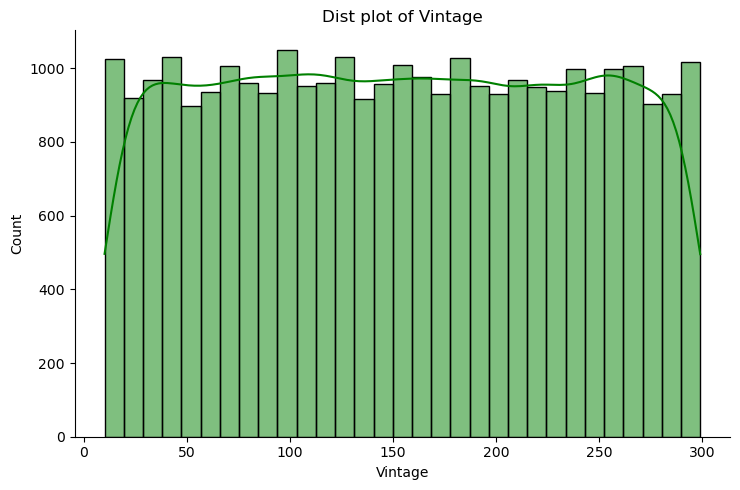

****************************************************************************************************


In [25]:
for col in num_col:
    sns.displot(df[col], color="Green", kde=True, height=5, aspect=1.5)
    plt.title(f"Dist plot of {col}")
    plt.tight_layout()
    plt.show()
    print("*"*100)

In [26]:
### Bivariate Analysis

In [27]:
df[num_col].cov()

Age  Region_Code  Annual_Premium  \
Age                     242.332654     8.344343    1.874519e+04   
Region_Code               8.344343   172.695867   -1.129771e+03   
Annual_Premium        18745.185495 -1129.771420    2.416740e+08   
Policy_Sales_Channel   -482.827258   -29.781813   -1.066929e+05   
Vintage                  -1.189794    -6.882177    4.168737e+03   

                      Policy_Sales_Channel      Vintage  
Age                            -482.827258    -1.189794  
Region_Code                     -29.781813    -6.882177  
Annual_Premium              -106692.858135  4168.737111  
Policy_Sales_Channel           2906.502195     5.320070  
Vintage                           5.320070  6977.562931

In [28]:
df[num_col].corr()

Age  Region_Code  Annual_Premium  \
Age                   1.000000     0.040789        0.077458   
Region_Code           0.040789     1.000000       -0.005530   
Annual_Premium        0.077458    -0.005530        1.000000   
Policy_Sales_Channel -0.575308    -0.042036       -0.127302   
Vintage              -0.000915    -0.006270        0.003210   

                      Policy_Sales_Channel   Vintage  
Age                              -0.575308 -0.000915  
Region_Code                      -0.042036 -0.006270  
Annual_Premium                   -0.127302  0.003210  
Policy_Sales_Channel              1.000000  0.001181  
Vintage                           0.001181  1.000000

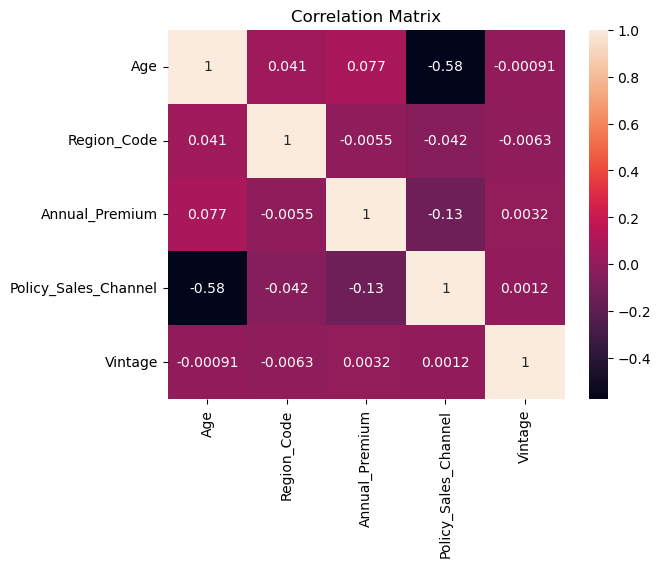

In [29]:
sns.heatmap(df[num_col].corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

### Multivariate Analysis

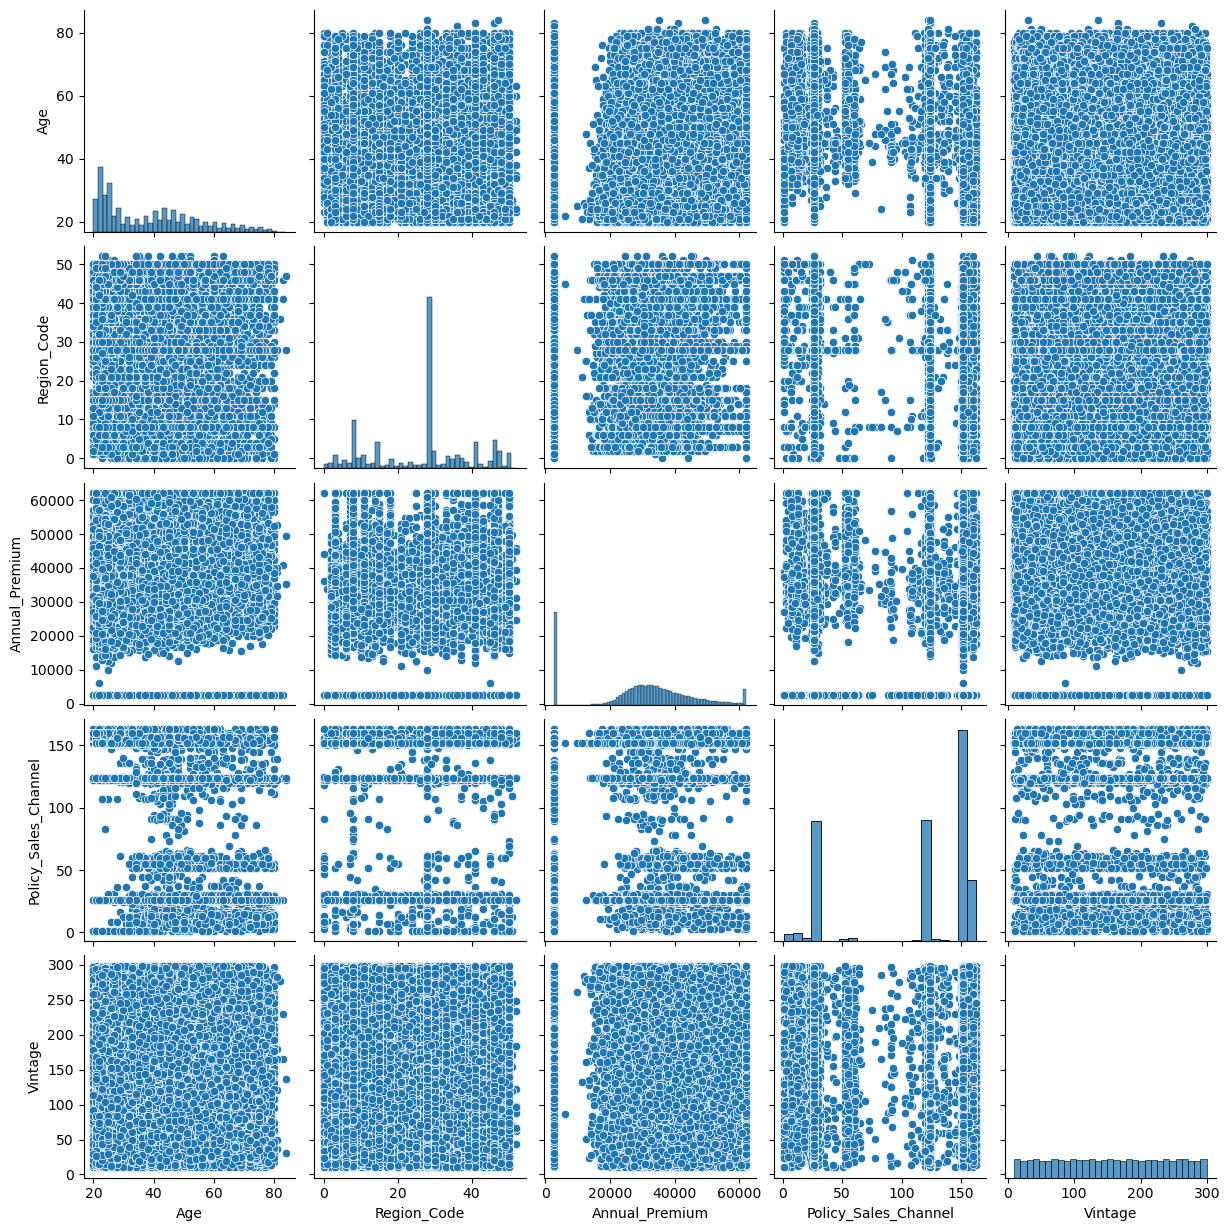

In [30]:
sns.pairplot(df[num_col])
plt.show()

### Visualization for categorical columns

In [31]:
df.head(1)

Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
0   Male   44                1           28                   0   > 2 Years   

  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0            Yes         40454.0                    26    217.0         1

In [32]:
cat_col=["Gender","Driving_License","Previously_Insured","Vehicle_Age","Vehicle_Damage","Response"]
for col in cat_col:
    print(f"Statistics for {col} :")
    print(f"Unique Values :",df[col].unique())
    print(f"No. of unique values :",df[col].nunique())
    print(f"Value count :",df[col].value_counts())
    print(f"Mode :",df[col].mode()[0])
    print("*"*100)

Statistics for Gender :
Unique Values : ['Male' 'Female']
No. of unique values : 2
Value count : Gender
Male      16188
Female    13811
Name: count, dtype: int64
Mode : Male
****************************************************************************************************
Statistics for Driving_License :
Unique Values : [1 0]
No. of unique values : 2
Value count : Driving_License
1    29933
0       66
Name: count, dtype: int64
Mode : 1
****************************************************************************************************
Statistics for Previously_Insured :
Unique Values : [0 1]
No. of unique values : 2
Value count : Previously_Insured
0    16427
1    13572
Name: count, dtype: int64
Mode : 0
****************************************************************************************************
Statistics for Vehicle_Age :
Unique Values : ['> 2 Years' '1-2 Year' '< 1 Year']
No. of unique values : 3
Value count : Vehicle_Age
1-2 Year     15673
< 1 Year     13057
> 2 Years    

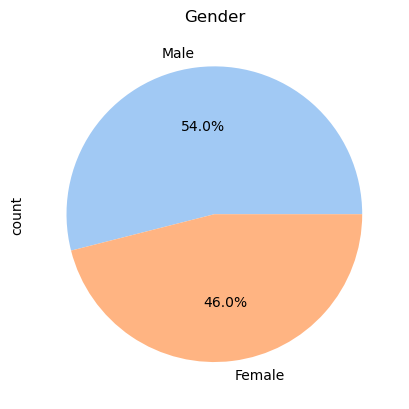

****************************************************************************************************


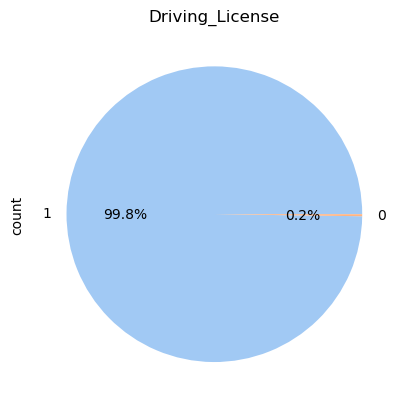

****************************************************************************************************


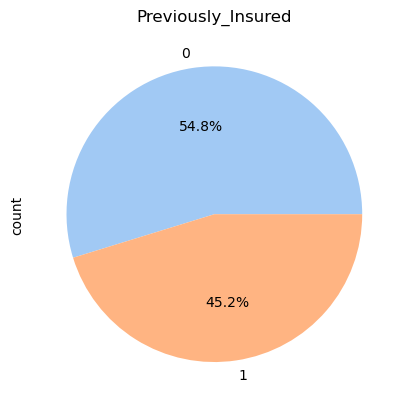

****************************************************************************************************


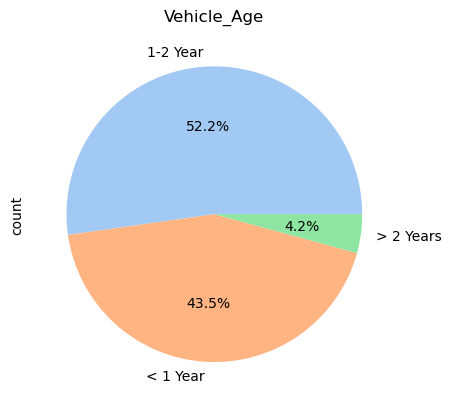

****************************************************************************************************


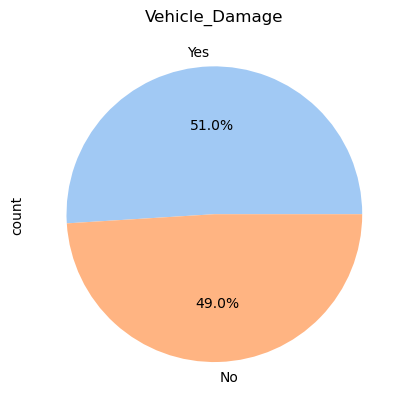

****************************************************************************************************


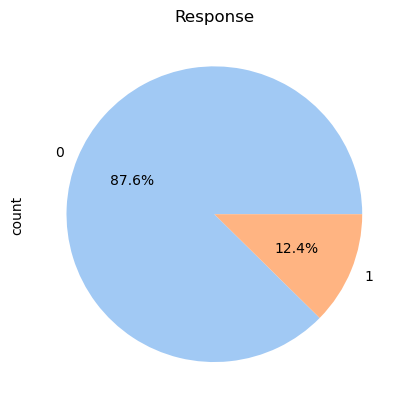

****************************************************************************************************


In [33]:
for col in cat_col:
    colors = sns.color_palette('pastel')
    df[col].value_counts().plot.pie(autopct='%1.1f%%', colors=colors)
    plt.title(col)
    plt.show()
    print("*"*100)

### Converting categorical data into numerical using LabelEncoder or replace

In [34]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [35]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [36]:
df["Gender"].replace({'Male':1,'Female':0},inplace=True)

In [37]:
df["Vehicle_Age"].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [38]:
df["Vehicle_Age"].replace({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2},inplace=True)

In [39]:
df['Vehicle_Damage'].unique()

array(['Yes', 'No'], dtype=object)

In [40]:
df['Vehicle_Damage'].replace({'Yes':1,'No':0},inplace=True)

In [41]:
df.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0       1   44                1           28                   0            2   
1       1   76                1            3                   0            1   
2       1   47                1           28                   0            2   
3       1   21                1           11                   1            0   
4       0   29                1           41                   1            0   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0               1         40454.0                    26    217.0         1  
1               0         33536.0                    26    183.0         0  
2               1         38294.0                    26     27.0         1  
3               0         28619.0                   152    203.0         0  
4               0         27496.0                   152     39.0         0

### splitting of Data into independant(x) and dependant(y) features for species column

In [42]:
x=df.drop("Response",axis=1)
x.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0       1   44                1           28                   0            2   
1       1   76                1            3                   0            1   
2       1   47                1           28                   0            2   
3       1   21                1           11                   1            0   
4       0   29                1           41                   1            0   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0               1         40454.0                    26    217.0  
1               0         33536.0                    26    183.0  
2               1         38294.0                    26     27.0  
3               0         28619.0                   152    203.0  
4               0         27496.0                   152     39.0

### Non- multicolinearity

In [43]:
vif_df=pd.DataFrame()
vif_df["Independant Featutes"]=x.columns
vif_df

Independant Featutes
0                Gender
1                   Age
2       Driving_License
3           Region_Code
4    Previously_Insured
5           Vehicle_Age
6        Vehicle_Damage
7        Annual_Premium
8  Policy_Sales_Channel
9               Vintage

In [44]:
vif_list=[]
for i in range(x.shape[1]):
    vif=variance_inflation_factor(df.to_numpy(),i)
    vif_list.append(vif)
vif_df["VIF"]=vif_list
vif_df

Independant Featutes        VIF
0                Gender   2.221121
1                   Age  18.408435
2       Driving_License  43.538588
3           Region_Code   5.022559
4    Previously_Insured   5.703099
5           Vehicle_Age   6.050268
6        Vehicle_Damage   6.511680
7        Annual_Premium   4.847812
8  Policy_Sales_Channel   8.188630
9               Vintage   4.380799

In [45]:
y=df["Response"]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Response, dtype: int64

### train test split

In [46]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)
print("Xtrain :",xtrain.shape)
print("Xtest :",xtest.shape)
print("Ytrain :",ytrain.shape)
print("Ytest :",ytest.shape)

Xtrain : (23999, 10)
Xtest : (6000, 10)
Ytrain : (23999,)
Ytest : (6000,)


### Model Training and Model Evaluation

#### Algorithm 1 : Logistic Regression

In [47]:
log_reg= LogisticRegression()
log_reg

LogisticRegression()

In [48]:
log_reg_model = log_reg.fit(xtrain,ytrain)
log_reg_model

LogisticRegression()

In [49]:
ytrain_pred= log_reg_model.predict(xtrain)
ytrain_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Model Evaluation

In [50]:
print("Model Evaluation for Training Data")
print("-"*100)

# accuracy score
acc= accuracy_score(ytrain,ytrain_pred)
print("Accuracy Score :", acc)
print("-"*100)

# confusion matrix
conf_mat= confusion_matrix(ytrain,ytrain_pred)
print("Confusion Matrix :\n", conf_mat)
print("-"*100)

# classification report
clf_rep= classification_report(ytrain,ytrain_pred)
print("Classification Report :\n", clf_rep)
print("*"*100)

Model Evaluation for Training Data
----------------------------------------------------------------------------------------------------
Accuracy Score : 0.8747864494353932
----------------------------------------------------------------------------------------------------
Confusion Matrix :
 [[20994     2]
 [ 3003     0]]
----------------------------------------------------------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     20996
           1       0.00      0.00      0.00      3003

    accuracy                           0.87     23999
   macro avg       0.44      0.50      0.47     23999
weighted avg       0.77      0.87      0.82     23999

****************************************************************************************************


In [51]:
ytest_pred=log_reg_model.predict(xtest)

In [52]:
print("Model Evaluation for Testing Data")
print("-"*100)

# accuracy score
acc= accuracy_score(ytest,ytest_pred)
print("Accuracy Score :", acc)
print("-"*100)

# confusion matrix
conf_mat= confusion_matrix(ytest,ytest_pred)
print("Confusion Matrix :\n", conf_mat)
print("-"*100)

# classification report
clf_rep= classification_report(ytest,ytest_pred)
print("Classification Report :\n", clf_rep)
print("*"*100)

Model Evaluation for Testing Data
----------------------------------------------------------------------------------------------------
Accuracy Score : 0.8811666666666667
----------------------------------------------------------------------------------------------------
Confusion Matrix :
 [[5287    1]
 [ 712    0]]
----------------------------------------------------------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      5288
           1       0.00      0.00      0.00       712

    accuracy                           0.88      6000
   macro avg       0.44      0.50      0.47      6000
weighted avg       0.78      0.88      0.83      6000

****************************************************************************************************


### Algorithm 2 : Decision Tree

In [53]:
dt_clf=DecisionTreeClassifier()
dt_clf

DecisionTreeClassifier()

In [54]:
dt_clf_model=dt_clf.fit(xtrain,ytrain)
dt_clf_model

DecisionTreeClassifier()

In [55]:
ytrain_pred=dt_clf_model.predict(xtrain)
ytest_pred=dt_clf_model.predict(xtest)

### Model Evaluation

In [56]:
print("model evaluation for training data")
print("*"*100)

# accuracy_score
acc=accuracy_score(ytrain,ytrain_pred)
print("Accuracy Score :",acc)
print("-"*100)

# confusion matrix
cm=confusion_matrix(ytrain,ytrain_pred)
print("Confusion Matrix :\n",cm)
print("-"*100)

# Classification Report
cla_re=classification_report(ytrain,ytrain_pred)
print("Classification Report :\n",cla_re)
print("-"*100)

model evaluation for training data
****************************************************************************************************
Accuracy Score : 1.0
----------------------------------------------------------------------------------------------------
Confusion Matrix :
 [[20996     0]
 [    0  3003]]
----------------------------------------------------------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20996
           1       1.00      1.00      1.00      3003

    accuracy                           1.00     23999
   macro avg       1.00      1.00      1.00     23999
weighted avg       1.00      1.00      1.00     23999

----------------------------------------------------------------------------------------------------


In [57]:
print("model evaluation for Testing data")
print("*"*100)

# Accuracy Score
acc=accuracy_score(ytest,ytest_pred)
print("Accuracy Score :",acc)
print("-"*100)

# Confusion Matrix
cm=confusion_matrix(ytest,ytest_pred)
print("Confusion Matrix :\n",cm)
print("-"*100)

# Classification Report
cla_re=classification_report(ytest,ytest_pred)
print("Classification Report :\n",cla_re)
print("-"*100)

model evaluation for Testing data
****************************************************************************************************
Accuracy Score : 0.827
----------------------------------------------------------------------------------------------------
Confusion Matrix :
 [[4729  559]
 [ 479  233]]
----------------------------------------------------------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      5288
           1       0.29      0.33      0.31       712

    accuracy                           0.83      6000
   macro avg       0.60      0.61      0.61      6000
weighted avg       0.84      0.83      0.83      6000

----------------------------------------------------------------------------------------------------


### Decision Tree with Hyperparameter Tunning

In [58]:
hyperparameters = {"criterion" : ["gini", "entropy", "log_loss"],
                   "max_depth" : np.arange(5,15),
                   "min_samples_split" : np.arange(2,10),
                   "min_samples_leaf" : np.arange(2,10)}
hyperparameters

{'criterion': ['gini', 'entropy', 'log_loss'],
 'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
 'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9])}

In [59]:
rscv = RandomizedSearchCV(dt_clf_model, hyperparameters, cv = 5)
rscv = rscv.fit(xtrain, ytrain)
rscv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=8,
                       min_samples_split=3)

In [60]:
dt_clf=DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=8)
dt_clf_rscv_model=dt_clf.fit(xtrain,ytrain)
dt_clf_rscv_model

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=8)

In [61]:
ytrain_pred=dt_clf_rscv_model.predict(xtrain)
ytest_pred=dt_clf_rscv_model.predict(xtest)

### Model Evaluation

In [62]:
print("model evaluation for training data")
print("*"*100)

# Accuracy Score
acc = accuracy_score(ytrain, ytrain_pred)
print("Accuracy Score : ", acc)
print("-"*100)

# Confusion Matrix
conf_mat = confusion_matrix(ytrain, ytrain_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*100)

# Classification Report
clf_report = classification_report(ytrain, ytrain_pred)
print("Classification Report : \n", clf_report)
print("-"*100)

model evaluation for training data
****************************************************************************************************
Accuracy Score :  0.8749947914496438
----------------------------------------------------------------------------------------------------
Confusion Matrix : 
 [[20987     9]
 [ 2991    12]]
----------------------------------------------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     20996
           1       0.57      0.00      0.01      3003

    accuracy                           0.87     23999
   macro avg       0.72      0.50      0.47     23999
weighted avg       0.84      0.87      0.82     23999

----------------------------------------------------------------------------------------------------


In [63]:
print("model evaluation for testing data")
print("*"*100)

# Accuracy Score
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*100)

# Confusion Matrix
conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*100)

# Classification Report
clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*100)

model evaluation for testing data
****************************************************************************************************
Accuracy Score :  0.8806666666666667
----------------------------------------------------------------------------------------------------
Confusion Matrix : 
 [[5282    6]
 [ 710    2]]
----------------------------------------------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      5288
           1       0.25      0.00      0.01       712

    accuracy                           0.88      6000
   macro avg       0.57      0.50      0.47      6000
weighted avg       0.81      0.88      0.83      6000

----------------------------------------------------------------------------------------------------


###  Algorithm4-Random Forest

In [64]:
rf=RandomForestClassifier()
rf

RandomForestClassifier()

In [65]:
rf_model=rf.fit(xtrain,ytrain)
rf_model

RandomForestClassifier()

In [66]:
ytrain_pred=rf_model.predict(xtrain)
ytest_pred=rf_model.predict(xtest)

In [67]:
print("Model Evaluation for Training Data")
print("-"*100)

# accuracy score
acc= accuracy_score(ytrain,ytrain_pred)
print("Accuracy Score :", acc)
print("-"*100)

# confusion matrix
conf_mat= confusion_matrix(ytrain,ytrain_pred)
print("Confusion Matrix :\n", conf_mat)
print("-"*100)

# classification report
clf_rep= classification_report(ytrain,ytrain_pred)
print("Classification Report :\n", clf_rep)
print("*"*100)

Model Evaluation for Training Data
----------------------------------------------------------------------------------------------------
Accuracy Score : 1.0
----------------------------------------------------------------------------------------------------
Confusion Matrix :
 [[20996     0]
 [    0  3003]]
----------------------------------------------------------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20996
           1       1.00      1.00      1.00      3003

    accuracy                           1.00     23999
   macro avg       1.00      1.00      1.00     23999
weighted avg       1.00      1.00      1.00     23999

****************************************************************************************************


In [68]:
print("model evaluation for testing data")
print("*"*100)

# Accuracy Score
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*100)

# Confusion Matrix
conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*100)

# Classification Report
clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*100)

model evaluation for testing data
****************************************************************************************************
Accuracy Score :  0.8738333333333334
----------------------------------------------------------------------------------------------------
Confusion Matrix : 
 [[5169  119]
 [ 638   74]]
----------------------------------------------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      5288
           1       0.38      0.10      0.16       712

    accuracy                           0.87      6000
   macro avg       0.64      0.54      0.55      6000
weighted avg       0.83      0.87      0.84      6000

----------------------------------------------------------------------------------------------------


### Algorithm5-Random Tree Classifier Hyper parameter turnning

In [69]:
hyperparameters={"criterion":["gini","entropy","log_loss"],
                 "max_depth":np.arange(5,15),
                 "min_samples_split":np.arange(2,10),
                 "min_samples_leaf":np.arange(2,10),
                 "n_estimators":np.arange(1,20)}
hyperparameters

{'criterion': ['gini', 'entropy', 'log_loss'],
 'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
 'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
 'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19])}

In [70]:
rscv=RandomizedSearchCV(rf_model,hyperparameters,cv=5)

In [71]:
rscv_model=rscv.fit(xtrain,ytrain)
rscv_model.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=7, min_samples_split=5,
                       n_estimators=14)

In [72]:
rfc=RandomForestClassifier(criterion='log_loss', max_depth=6, min_samples_leaf=5,
                       min_samples_split=3, n_estimators=9)

In [73]:
rfc_model=rfc.fit(xtrain,ytrain)
rfc_model

RandomForestClassifier(criterion='log_loss', max_depth=6, min_samples_leaf=5,
                       min_samples_split=3, n_estimators=9)

In [74]:
ytrain_pred=rfc_model.predict(xtrain)
ytest_pred=rfc_model.predict(xtest)

###  Model Evaluation with Random Forest Hyperparameter Tunning

In [75]:
print("Model Evaluation for Training Data")
print("-"*100)

# accuracy score
acc= accuracy_score(ytrain,ytrain_pred)
print("Accuracy Score :", acc)
print("-"*100)

# confusion matrix
conf_mat= confusion_matrix(ytrain,ytrain_pred)
print("Confusion Matrix :\n", conf_mat)
print("-"*100)

# classification report
clf_rep= classification_report(ytrain,ytrain_pred)
print("Classification Report :\n", clf_rep)
print("*"*100)

Model Evaluation for Training Data
----------------------------------------------------------------------------------------------------
Accuracy Score : 0.8748697862410934
----------------------------------------------------------------------------------------------------
Confusion Matrix :
 [[20996     0]
 [ 3003     0]]
----------------------------------------------------------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     20996
           1       0.00      0.00      0.00      3003

    accuracy                           0.87     23999
   macro avg       0.44      0.50      0.47     23999
weighted avg       0.77      0.87      0.82     23999

****************************************************************************************************


In [76]:
print("model evaluation for testing data")
print("*"*100)

# Accuracy Score
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*100)

# Confusion Matrix
conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*100)

# Classification Report
clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*100)

model evaluation for testing data
****************************************************************************************************
Accuracy Score :  0.8813333333333333
----------------------------------------------------------------------------------------------------
Confusion Matrix : 
 [[5288    0]
 [ 712    0]]
----------------------------------------------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      5288
           1       0.00      0.00      0.00       712

    accuracy                           0.88      6000
   macro avg       0.44      0.50      0.47      6000
weighted avg       0.78      0.88      0.83      6000

----------------------------------------------------------------------------------------------------


#### 6. Adaboost Algorithm

In [77]:
adb=AdaBoostClassifier()
adb_model=adb.fit(xtrain,ytrain)
adb_model

AdaBoostClassifier()

In [78]:
ytrain_pred=adb_model.predict(xtrain)
ytest_pred=adb_model.predict(xtest)

In [79]:
print("Model Evaluation for Training Data")
print("-"*100)

# accuracy score
acc= accuracy_score(ytrain,ytrain_pred)
print("Accuracy Score :", acc)
print("-"*100)

# confusion matrix
conf_mat= confusion_matrix(ytrain,ytrain_pred)
print("Confusion Matrix :\n", conf_mat)
print("-"*100)

# classification report
clf_rep= classification_report(ytrain,ytrain_pred)
print("Classification Report :\n", clf_rep)
print("*"*100)

print("\n\nmodel evaluation for testing data")
print("*"*100)

# Accuracy Score
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*100)

# Confusion Matrix
conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*100)

# Classification Report
clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*100)

Model Evaluation for Training Data
----------------------------------------------------------------------------------------------------
Accuracy Score : 0.8749114546439435
----------------------------------------------------------------------------------------------------
Confusion Matrix :
 [[20984    12]
 [ 2990    13]]
----------------------------------------------------------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     20996
           1       0.52      0.00      0.01      3003

    accuracy                           0.87     23999
   macro avg       0.70      0.50      0.47     23999
weighted avg       0.83      0.87      0.82     23999

****************************************************************************************************


model evaluation for testing data
**************************************************************************************

#### 7. Adaboost with hyperparameter tunning

In [80]:
hyperparameters={"n_estimators":np.arange(2,41),
                "learning_rate":[0,0.1,0.001,0.1,1]
               }
hyperparameters

{'n_estimators': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40]),
 'learning_rate': [0, 0.1, 0.001, 0.1, 1]}

In [81]:
rscv_adb=RandomizedSearchCV(adb_model,hyperparameters,cv=5)
rscv_adb_model=rscv_adb.fit(xtrain,ytrain)
rscv_adb_model.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=6)

In [82]:
adb=AdaBoostClassifier(learning_rate=0.1, n_estimators=31)

In [83]:
rscv_adb_model=adb.fit(xtrain,ytrain)
rscv_adb_model

AdaBoostClassifier(learning_rate=0.1, n_estimators=31)

In [84]:
ytrain_pred=rscv_adb_model.predict(xtrain)
ytest_pred=rscv_adb_model.predict(xtest)

In [85]:
print("Model Evaluation for Training Data")
print("-"*100)

# accuracy score
acc= accuracy_score(ytrain,ytrain_pred)
print("Accuracy Score :", acc)
print("-"*100)

# confusion matrix
conf_mat= confusion_matrix(ytrain,ytrain_pred)
print("Confusion Matrix :\n", conf_mat)
print("-"*100)

# classification report
clf_rep= classification_report(ytrain,ytrain_pred)
print("Classification Report :\n", clf_rep)
print("*"*100)

print("\n\nmodel evaluation for testing data")
print("*"*100)

# Accuracy Score
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*100)

# Confusion Matrix
conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*100)

# Classification Report
clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*100)

Model Evaluation for Training Data
----------------------------------------------------------------------------------------------------
Accuracy Score : 0.8748697862410934
----------------------------------------------------------------------------------------------------
Confusion Matrix :
 [[20996     0]
 [ 3003     0]]
----------------------------------------------------------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     20996
           1       0.00      0.00      0.00      3003

    accuracy                           0.87     23999
   macro avg       0.44      0.50      0.47     23999
weighted avg       0.77      0.87      0.82     23999

****************************************************************************************************


model evaluation for testing data
**************************************************************************************

#### 8. GradientBoost Algo

In [86]:
gb=GradientBoostingClassifier()
gb_model=gb.fit(xtrain,ytrain)
gb_model

GradientBoostingClassifier()

In [87]:
ytrain_pred=gb_model.predict(xtrain)
ytest_pred=gb_model.predict(xtest)

In [88]:
print("Model Evaluation for Training Data")
print("-"*100)

# accuracy score
acc= accuracy_score(ytrain,ytrain_pred)
print("Accuracy Score :", acc)
print("-"*100)

# confusion matrix
conf_mat= confusion_matrix(ytrain,ytrain_pred)
print("Confusion Matrix :\n", conf_mat)
print("-"*100)

# classification report
clf_rep= classification_report(ytrain,ytrain_pred)
print("Classification Report :\n", clf_rep)
print("*"*100)

print("\n\nmodel evaluation for testing data")
print("*"*100)

# Accuracy Score
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*100)

# Confusion Matrix
conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*100)

# Classification Report
clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*100)

Model Evaluation for Training Data
----------------------------------------------------------------------------------------------------
Accuracy Score : 0.8762865119379974
----------------------------------------------------------------------------------------------------
Confusion Matrix :
 [[20979    17]
 [ 2952    51]]
----------------------------------------------------------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     20996
           1       0.75      0.02      0.03      3003

    accuracy                           0.88     23999
   macro avg       0.81      0.51      0.48     23999
weighted avg       0.86      0.88      0.82     23999

****************************************************************************************************


model evaluation for testing data
**************************************************************************************

#### 9. Gradientboost with hyperparameter tunning

In [89]:
hyperparameters={"n_estimators":np.arange(2,21),
                "learning_rate":[0,0.2,0.5,0.009,0.06]
                }
hyperparameters

{'n_estimators': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20]),
 'learning_rate': [0, 0.2, 0.5, 0.009, 0.06]}

In [90]:
rscv_gb=RandomizedSearchCV(gb_model,hyperparameters,cv=5)
rscv_gb_model=rscv_gb.fit(xtrain,ytrain)
rscv_gb_model.best_estimator_

GradientBoostingClassifier(learning_rate=0, n_estimators=7)

In [91]:
gb=GradientBoostingClassifier(learning_rate=0.06, n_estimators=12)

In [92]:
rscv_gb_model=gb.fit(xtrain,ytrain)
rscv_gb_model

GradientBoostingClassifier(learning_rate=0.06, n_estimators=12)

In [93]:
ytrain_pred=rscv_gb_model.predict(xtrain)
ytest_pred=rscv_gb_model.predict(xtest)

In [94]:
print("Model Evaluation for Training Data")
print("-"*100)

# accuracy score
acc= accuracy_score(ytrain,ytrain_pred)
print("Accuracy Score :", acc)
print("-"*100)

# confusion matrix
conf_mat= confusion_matrix(ytrain,ytrain_pred)
print("Confusion Matrix :\n", conf_mat)
print("-"*100)

# classification report
clf_rep= classification_report(ytrain,ytrain_pred)
print("Classification Report :\n", clf_rep)
print("*"*100)

print("\n\nmodel evaluation for testing data")
print("*"*100)

# Accuracy Score
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*100)

# Confusion Matrix
conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*100)

# Classification Report
clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*100)

Model Evaluation for Training Data
----------------------------------------------------------------------------------------------------
Accuracy Score : 0.8748697862410934
----------------------------------------------------------------------------------------------------
Confusion Matrix :
 [[20996     0]
 [ 3003     0]]
----------------------------------------------------------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     20996
           1       0.00      0.00      0.00      3003

    accuracy                           0.87     23999
   macro avg       0.44      0.50      0.47     23999
weighted avg       0.77      0.87      0.82     23999

****************************************************************************************************


model evaluation for testing data
**************************************************************************************

#### 10. XGBoost Algo

In [95]:
xgb=XGBClassifier()
xgb_model=xgb.fit(xtrain,ytrain)
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [96]:
ytrain_pred=xgb_model.predict(xtrain)
ytest_pred=xgb_model.predict(xtest)

In [97]:
print("Model Evaluation for Training Data")
print("-"*100)

# accuracy score
acc= accuracy_score(ytrain,ytrain_pred)
print("Accuracy Score :", acc)
print("-"*100)

# confusion matrix
conf_mat= confusion_matrix(ytrain,ytrain_pred)
print("Confusion Matrix :\n", conf_mat)
print("-"*100)

# classification report
clf_rep= classification_report(ytrain,ytrain_pred)
print("Classification Report :\n", clf_rep)
print("*"*100)

print("\n\nmodel evaluation for testing data")
print("*"*100)

# Accuracy Score
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*100)

# Confusion Matrix
conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*100)

# Classification Report
clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*100)

Model Evaluation for Training Data
----------------------------------------------------------------------------------------------------
Accuracy Score : 0.9157048210342098
----------------------------------------------------------------------------------------------------
Confusion Matrix :
 [[20880   116]
 [ 1907  1096]]
----------------------------------------------------------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     20996
           1       0.90      0.36      0.52      3003

    accuracy                           0.92     23999
   macro avg       0.91      0.68      0.74     23999
weighted avg       0.91      0.92      0.90     23999

****************************************************************************************************


model evaluation for testing data
**************************************************************************************

#### 11. XGBoost Algo with hyperparameter tunning

In [98]:
hyperparameters={"n_estimators":np.arange(2,21),
                 "learning_rate":[0.5,0.33,0.22,1,0.011]
                }
hyperparameters

{'n_estimators': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20]),
 'learning_rate': [0.5, 0.33, 0.22, 1, 0.011]}

In [99]:
rscv_xgb=RandomizedSearchCV(xgb_model,hyperparameters,cv=5)
rscv_xgb_model=rscv_xgb.fit(xtrain,ytrain)
rscv_xgb_model.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.011, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=17, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [100]:
xgb=XGBClassifier(n_estimators=18,learning_rate=0.011)

In [101]:
rscv_xgb_model=xgb.fit(xtrain,ytrain)
rscv_xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.011, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=18, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [102]:
ytrain_pred=rscv_xgb_model.predict(xtrain)
ytest_pred=rscv_xgb_model.predict(xtest)

In [103]:
print("Model Evaluation for Training Data")
print("-"*100)

# accuracy score
acc= accuracy_score(ytrain,ytrain_pred)
print("Accuracy Score :", acc)
print("-"*100)

# confusion matrix
conf_mat= confusion_matrix(ytrain,ytrain_pred)
print("Confusion Matrix :\n", conf_mat)
print("-"*100)

# classification report
clf_rep= classification_report(ytrain,ytrain_pred)
print("Classification Report :\n", clf_rep)
print("*"*100)

print("\n\nmodel evaluation for testing data")
print("*"*100)

# Accuracy Score
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*100)

# Confusion Matrix
conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*100)

# Classification Report
clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*100)

Model Evaluation for Training Data
----------------------------------------------------------------------------------------------------
Accuracy Score : 0.8748697862410934
----------------------------------------------------------------------------------------------------
Confusion Matrix :
 [[20996     0]
 [ 3003     0]]
----------------------------------------------------------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     20996
           1       0.00      0.00      0.00      3003

    accuracy                           0.87     23999
   macro avg       0.44      0.50      0.47     23999
weighted avg       0.77      0.87      0.82     23999

****************************************************************************************************


model evaluation for testing data
**************************************************************************************

#### 12. K-Nearest Neighbors Algorithm

In [104]:
knn=KNeighborsClassifier(n_neighbors=4)
knn

KNeighborsClassifier(n_neighbors=4)

In [105]:
knn_model=knn.fit(xtrain,ytrain)
knn_model

KNeighborsClassifier(n_neighbors=4)

In [106]:
ytrain_pred=knn_model.predict(xtrain)
ytest_pred=knn_model.predict(xtest)

In [107]:
print("Model Evaluation for Training Data")
print("-"*100)

# accuracy score
acc= accuracy_score(ytrain,ytrain_pred)
print("Accuracy Score :", acc)
print("-"*100)

# confusion matrix
conf_mat= confusion_matrix(ytrain,ytrain_pred)
print("Confusion Matrix :\n", conf_mat)
print("-"*100)

# classification report
clf_rep= classification_report(ytrain,ytrain_pred)
print("Classification Report :\n", clf_rep)
print("*"*100)

print("\n\nmodel evaluation for testing data")
print("*"*100)

# Accuracy Score
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*100)

# Confusion Matrix
conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*100)

# Classification Report
clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*100)

Model Evaluation for Training Data
----------------------------------------------------------------------------------------------------
Accuracy Score : 0.8814533938914122
----------------------------------------------------------------------------------------------------
Confusion Matrix :
 [[20924    72]
 [ 2773   230]]
----------------------------------------------------------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     20996
           1       0.76      0.08      0.14      3003

    accuracy                           0.88     23999
   macro avg       0.82      0.54      0.54     23999
weighted avg       0.87      0.88      0.84     23999

****************************************************************************************************


model evaluation for testing data
**************************************************************************************

#### 13. K-Nearest Neighbors Algorithm with hyperparameter tunning

In [108]:
hyperparameters={"p":[1,2],
                 "n_neighbors":np.arange(2,10)
                }
hyperparameters

{'p': [1, 2], 'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9])}

In [109]:
rscv_knn=RandomizedSearchCV(knn_model,hyperparameters,cv=5)
rscv_knn_model=rscv_knn.fit(xtrain,ytrain)
rscv_knn_model.best_estimator_

KNeighborsClassifier(n_neighbors=8)

In [110]:
knn=KNeighborsClassifier(n_neighbors=8)

In [111]:
rscv_knn_model=knn.fit(xtrain,ytrain)
rscv_knn_model

KNeighborsClassifier(n_neighbors=8)

In [112]:
ytrain_pred=rscv_knn_model.predict(xtrain)
ytest_pred=rscv_knn_model.predict(xtest)

In [113]:
print("Model Evaluation for Training Data")
print("-"*100)

# accuracy score
acc= accuracy_score(ytrain,ytrain_pred)
print("Accuracy Score :", acc)
print("-"*100)

# confusion matrix
conf_mat= confusion_matrix(ytrain,ytrain_pred)
print("Confusion Matrix :\n", conf_mat)
print("-"*100)

# classification report
clf_rep= classification_report(ytrain,ytrain_pred)
print("Classification Report :\n", clf_rep)
print("*"*100)

print("\n\nmodel evaluation for testing data")
print("*"*100)

# Accuracy Score
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*100)

# Confusion Matrix
conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*100)

# Classification Report
clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*100)

Model Evaluation for Training Data
----------------------------------------------------------------------------------------------------
Accuracy Score : 0.8757448227009459
----------------------------------------------------------------------------------------------------
Confusion Matrix :
 [[20964    32]
 [ 2950    53]]
----------------------------------------------------------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     20996
           1       0.62      0.02      0.03      3003

    accuracy                           0.88     23999
   macro avg       0.75      0.51      0.48     23999
weighted avg       0.84      0.88      0.82     23999

****************************************************************************************************


model evaluation for testing data
**************************************************************************************

In [114]:
training_acc=[]
testing_acc=[]

for k in range(2,10):
    knn=KNeighborsClassifier(k)
    knn_model=knn.fit(xtrain,ytrain)

    #Predict Training Accuracy
    ytrain_pred=knn_model.predict(xtrain)
    
    acc=accuracy_score(ytrain,ytrain_pred)
    training_acc.append(acc)

    #Predict Testing Accuracy
    ytest_pred=knn_model.predict(xtest)

    accuracy=accuracy_score(ytest,ytest_pred)
    testing_acc.append(accuracy)

##### Training Accuracy Against K values

Text(0.5, 0, 'K values')

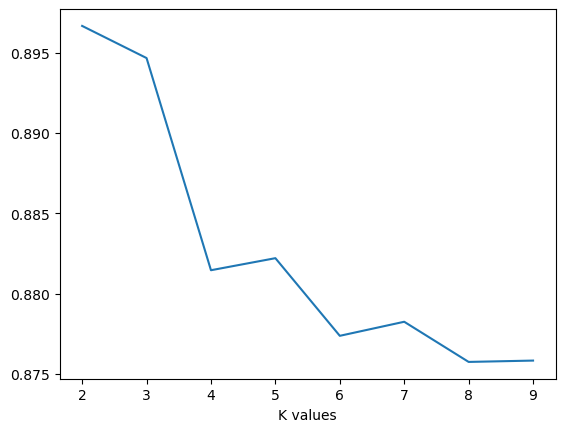

In [115]:
k = np.arange(2,10)
sns.lineplot(x=k,y=training_acc)
plt.xlabel("K values")

##### Testing Accuracy Against K values

Text(0.5, 0, 'K values')

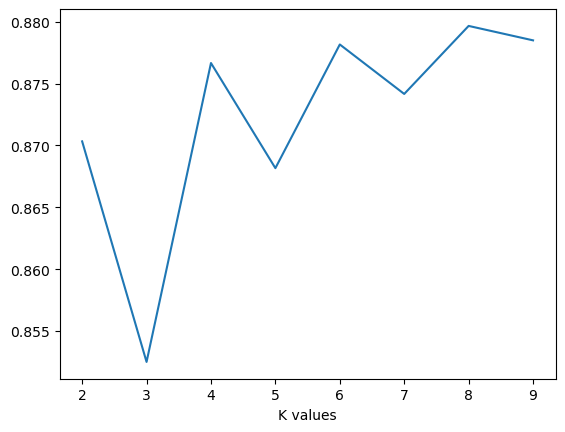

In [116]:
k = np.arange(2,10)
sns.lineplot(x=k,y=testing_acc)
plt.xlabel("K values")

 #### Algorithm 14-SVM(Support vector methods)

In [117]:
svm=SVC()
svm

SVC()

In [118]:
svm_model=svm.fit(xtrain,ytrain)
svm_model

SVC()

In [119]:
ytrain_pred=svm_model.predict(xtrain)
ytest_pred=svm_model.predict(xtest)

In [120]:
print("Model Evaluation for Training Data")
print("-"*100)

# accuracy score
acc= accuracy_score(ytrain,ytrain_pred)
print("Accuracy Score :", acc)
print("-"*100)

# confusion matrix
conf_mat= confusion_matrix(ytrain,ytrain_pred)
print("Confusion Matrix :\n", conf_mat)
print("-"*100)

# classification report
clf_rep= classification_report(ytrain,ytrain_pred)
print("Classification Report :\n", clf_rep)
print("*"*100)

print("\n\nmodel evaluation for testing data")
print("*"*100)

# Accuracy Score
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*100)

# Confusion Matrix
conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*100)

# Classification Report
clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*100)

Model Evaluation for Training Data
----------------------------------------------------------------------------------------------------
Accuracy Score : 0.8748697862410934
----------------------------------------------------------------------------------------------------
Confusion Matrix :
 [[20996     0]
 [ 3003     0]]
----------------------------------------------------------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     20996
           1       0.00      0.00      0.00      3003

    accuracy                           0.87     23999
   macro avg       0.44      0.50      0.47     23999
weighted avg       0.77      0.87      0.82     23999

****************************************************************************************************


model evaluation for testing data
**************************************************************************************

### Save to pickel

In [121]:
with open("response_predict.pkl","wb")as f:
    pickle.dump(rf_model,f)

In [122]:
test_data=xtrain.head(2)
test_data

Gender  Age  Driving_License  Region_Code  Previously_Insured  \
7018        1   63                1           48                   0   
23878       0   36                1           28                   1   

       Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
7018             1               1          2630.0                    26   
23878            1               0         50235.0                   124   

       Vintage  
7018     290.0  
23878    202.0

In [123]:
ytrain.head(2)

7018     0
23878    0
Name: Response, dtype: int64

In [124]:
with open("response_predict.pkl","rb")as f:
    final_model=pickle.load(f)

In [125]:
final_model.predict(test_data)[0]

0

####  PREDICT DATA

In [ ]:
with open("response_predict.pkl","rb")as f:
    final_model=pickle.load(f)
def data():
    print("Enter data to predict response if customers will buy health insurance or not")
    Gender=int(input("Enter Gender ['Male':1, 'Female':0] :"))
    Age=int(input("Enter Age :"))
    Driving_License=int(input("Enter Driving_License ['Yes':1, 'No':0] :"))
    Region_Code=float(input("Enter Region :"))
    Previously_Insured=int(input("Enter Previous Insured ['Yes':1, 'No':0] :"))
    Vehicle_Age=int(input("Enter Vehicle Age '< 1 Year':0,'1-2 Year':1,'> 2 Years':2 :"))
    Vehicle_Damage=int(input("Enter Is Vehicle Damage ['Yes':1, 'No':0] :"))
    Annual_Premium=float(input("Enter Anually Premiun in rupees :"))
    Policy_Sales_Channel=float(input("Enter Policy Sales Channel :"))
    Vintage=float(input("Enter Vintage :"))

    testdata={"Gender":[Gender],
    "Age":[Age],
    "Driving_License":[Driving_License],
    "Region_Code":[Region_Code],
    "Previously_Insured":[Previously_Insured],
    "Vehicle_Age":[Vehicle_Age],
    "Vehicle_Damage":[Vehicle_Damage],
    "Annual_Premium":[Annual_Premium],
    "Policy_Sales_Channel":[Policy_Sales_Channel],
    "Vintage":[Vintage]
             }
    td=pd.DataFrame(testdata)
    display(td)
    return td

input_data=data()

predict=final_model.predict(input_data)

print("\n")
if predict[0]==0:
    print("Response : N0, The customer will not buy health insurance")
else:
    print("Response : Yes, The customer will interested to buy health insurance")

Enter data to predict response if customers will buy health insurance or not


Enter Gender ['Male':1, 'Female':0] : 1
Enter Age : 23
Enter Driving_License ['Yes':1, 'No':0] : 1
Enter Region : 22


In [ ]:
%%writefile Health_Cross_Sales_Prediction_app.py 
import streamlit as st
import pickle
import pandas as pd

# Load the trained model
@st.cache_resource
def load_model():
    with open("response_predict.pkl", "rb") as file:
        model = pickle.load(file)
    return model

model = load_model()

# Streamlit UI
st.title("🚗 Health Insurance Purchase Prediction")

# User Inputs
Gender = st.selectbox("Select Gender", ["Male", "Female"])
Age = st.number_input("Enter Age", min_value=18, max_value=100, step=1)
Driving_License = st.selectbox("Do you have a Driving License?", ["No (0)", "Yes (1)"])
Region_Code = st.number_input("Enter Region Code", min_value=0.0, step=0.1)
Previously_Insured = st.selectbox("Previously Insured?", ["No (0)", "Yes (1)"])
Vehicle_Age = st.selectbox("Vehicle Age", ["< 1 Year", "1-2 Year", "> 2 Years"])
Vehicle_Damage = st.selectbox("Was the Vehicle Damaged?", ["No (0)", "Yes (1)"])
Annual_Premium = st.number_input("Enter Annual Premium (₹)", min_value=1000.0, step=100.0)
Policy_Sales_Channel = st.number_input("Enter Policy Sales Channel", min_value=0.0, step=1.0)
Vintage = st.number_input("Enter Vintage", min_value=0, step=1)

# Encoding categorical inputs
Gender = 1 if Gender == "Male" else 0
Driving_License = int(Driving_License.split()[1][1])  # Extract numeric value
Previously_Insured = int(Previously_Insured.split()[1][1])  # Extract numeric value
Vehicle_Age = {"< 1 Year": 0, "1-2 Year": 1, "> 2 Years": 2}[Vehicle_Age]
Vehicle_Damage = int(Vehicle_Damage.split()[1][1])  # Extract numeric value

# Create DataFrame for Prediction
input_data = pd.DataFrame({
    "Gender": [Gender],
    "Age": [Age],
    "Driving_License": [Driving_License],
    "Region_Code": [Region_Code],
    "Previously_Insured": [Previously_Insured],
    "Vehicle_Age": [Vehicle_Age],
    "Vehicle_Damage": [Vehicle_Damage],
    "Annual_Premium": [Annual_Premium],
    "Policy_Sales_Channel": [Policy_Sales_Channel],
    "Vintage": [Vintage]
})

# Prediction Button
if st.button("Predict 🚀"):
    prediction = model.predict(input_data)
    result = "✅ Will Purchase Insurance" if prediction[0] == 1 else "❌ Will Not Purchase Insurance"
    st.success(f"**Prediction Result:** {result}")
